In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive

/content/drive/My Drive


In [3]:
ls

'=0.3.2'
 394499700164290_signed.pdf
 accuracy_han.png
 C8_Chethan.vcf
'Colab Notebooks'/
'Getting started.pdf'
 glove.6B.100d.txt
 glove.6B.200d.txt
 glove.6B.300d.txt
 glove.6B.50d.txt
 glove.6B.zip
'gods Resume.pdf'
 Hotel_Reviews-515k-hotel-reviews-data-in-europe.csv
 Hotel_Reviews.csv
 loss_han.png
 model.h5
 model_han_.hdf5
'open?id=1-3pRKdLxcIpMCjUFaD1ci4OwUtFuJd3J'
'open?id=1en5jXle_cW1XTksKKoP3RBa9Nki4J9xp'
'open?id=1en5jXle_cW1XTksKKoP3RBa9Nki4J9xp.1'
'open?id=1en5jXle_cW1XTksKKoP3RBa9Nki4J9xp.2'
'open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq'
'open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq.1'
'open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq.2'
'open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq.3'
'open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq.4'
'open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq.5'
 Resume12.gdoc
 Resume12.pdf
'Resume (1).gdoc'
'Resume (2).gdoc'
'Resume (3).gdoc'
 Resume.gdoc
 wiki-news-300d-1M.vec
 wiki-news-300d-1M.vec.zip


In [4]:
!pip install RMDL

     |████████████████████████████████| 51kB 2.1MB/s 


In [5]:
import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from gensim.models import KeyedVectors
from RMDL import text_feature_extraction as txt
import numpy as np
from RMDL import RMDL_Text as RMDL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing

Using TensorFlow backend.


sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
reviews_df = pd.read_csv('Hotel_Reviews.csv')
print(reviews_df.dtypes)


Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [0]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

In [0]:
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

In [0]:
cleaned_positive_reviews = [clean(r) for r in positive_reviews] 
cleaned_negative_reviews = [clean(r) for r in negative_reviews] 

In [0]:
reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [0]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(p)
    else : 
        reviews_text.append(n)
        reviews_text.append(p)

In [0]:
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

In [0]:
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)

In [0]:
dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)


In [15]:
training_reviews[:10]

[' nothing',
 ' breakfast',
 ' friday evening it took a long time to get served whilst sat at the bar despite it not being particularly busy and the barman knowing we were waiting friday night i intended having room service when we got back to the room as we had not eaten all day i was looking forward to a pizza without the cheese as i am vegan but the kitchen was closed and i was only offered a selection of sandwiches all of which for not suitable for me as they were all pre made with meat or dairy i had to eat the pringles out of the mini bar had room service for breakfast there was no a massive choice for me but i managed however the fruit and coffee was delivered on time the cooked meal not until i had rung the kitchen to chase it up i didnt book a riim with a view but would have paid extra for one if offered instead i had the view of the air con and litter ',
 ' well appointed stylish hotel well positioned with good size comfortable room good ambience in the bar with good tunes fr

In [16]:
tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(training_reviews)
sequences = tokenizer.texts_to_sequences(training_reviews)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

MAX_SEQUENCE_LENGTH = 1000

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10750 unique tokens.
Shape of data tensor: (16820, 1000)
Shape of label tensor: (16820, 2)


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(data, labels, test_size=0.5, random_state=42)

In [18]:
!wget https://drive.google.com/open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq


--2020-05-21 02:23:00--  https://drive.google.com/open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq
Resolving drive.google.com (drive.google.com)... 172.217.203.101, 172.217.203.138, 172.217.203.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.101|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://drive.google.com/file/d/1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq/view?usp=drive_open [following]
--2020-05-21 02:23:00--  https://drive.google.com/file/d/1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq/view?usp=drive_open
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq.6’

open?id=1xzt06g_xeP     [ <=>                ]  68.51K  --.-KB/s    in 0.006s  

2020-05-21 02:23:00 (11.7 MB/s) - ‘open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq.6’ saved [70155]



In [19]:
model_ft = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import keras


In [21]:
vocabSize = len(word_index) + 1
# Querying SQLlite database to extract needed words embeddings
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(training_reviews)
vocabSize = len(tokenizer.word_index) + 1
vocabSize

10751

In [22]:
EMBEDDING_DIM = 300
MAX_NUM_WORDS=500
print('Preparing embedding matrix.fast text')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
print(num_words)
embedding_matrix = np.zeros((vocabSize, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    if word in model_ft.vocab:
      embedding_vector = model_ft[word]
      embedding_vector = np.array(embedding_vector)
      if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
          embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)

Preparing embedding matrix.fast text
500
(10751, 300)


In [23]:
print(labels)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import nltk
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabSize, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, trainable=False),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 300)         3225300   
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          192128    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 50        
Total params: 3,460,254
Trainable params: 234,954
Non-trainable params: 3,225,300
_________________________________________________________________


In [26]:
# model fit
history=model.fit(x_train, y_train,
          batch_size=256,
          epochs=5,verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/5
53/53 [==============================] - 491s 9s/step - loss: 0.5801 - accuracy: 0.6781 - val_loss: 0.4251 - val_accuracy: 0.8031
Epoch 2/5
53/53 [==============================] - 470s 9s/step - loss: 0.3647 - accuracy: 0.8479 - val_loss: 0.2995 - val_accuracy: 0.8878
Epoch 3/5
53/53 [==============================] - 467s 9s/step - loss: 0.2873 - accuracy: 0.8858 - val_loss: 0.2631 - val_accuracy: 0.8969
Epoch 4/5
53/53 [==============================] - 471s 9s/step - loss: 0.2604 - accuracy: 0.8948 - val_loss: 0.2461 - val_accuracy: 0.9038
Epoch 5/5
53/53 [==============================] - 472s 9s/step - loss: 0.2437 - accuracy: 0.9011 - val_loss: 0.2366 - val_accuracy: 0.9026


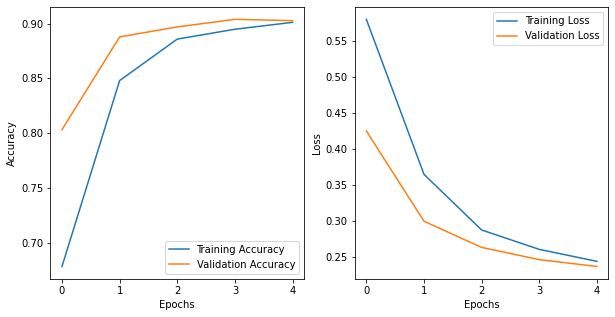

In [27]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show()

In [34]:
loss, accuracy = model.evaluate(x_test,y_test)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

263/263 [==============================] - 95s 363ms/step - loss: 0.2332 - accuracy: 0.9030
Test Loss: 0.23319599032402039
Test Accuracy: 0.9029726386070251
